<a href="https://colab.research.google.com/github/provincit/scikit-learn-tutorials/blob/master/1_simple_linear_classification_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Iris data

In [1]:
from sklearn import datasets
iris = datasets.load_iris()

# split
X_iris, y_iris = iris.data, iris.target

print(X_iris.shape)
print(y_iris.shape)

(150, 4)
(150,)


Import preprocessing functions

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Seek
X, y = X_iris[:, :2], y_iris

# split train and test set 

# Test set will be the 20 % taken randomly

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

print(X_train.shape)

print(y_train.shape)


(120, 2)
(120,)


In [3]:
# Standardize the features

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

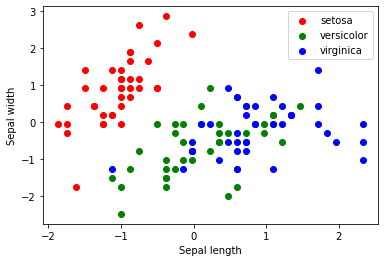

In [4]:
import matplotlib.pyplot as plt

colors = ['red', 'green', 'blue']

for i in range(len(colors)):
  xs = X_train[:, 0][y_train == i]
  ys = X_train[:, 1][y_train == i]
  plt.scatter(xs, ys, c=colors[i])
  plt.legend(iris.target_names)
  plt.xlabel('Sepal length')
  plt.ylabel('Sepal width')

### Use SGD (Stochastic gradient descent)

In [5]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train, y_train)

print(clf.coef_)

[[-28.74522592  19.08698234]
 [  0.63557431  -0.62506915]
 [  7.22565281  -5.68497825]]


In [6]:
print(clf.intercept_)

[-15.31364696  -2.693868    -5.28939766]


In [7]:
import numpy as np

import pylab
from matplotlib.pyplot import figure

## Made boundaries

<Figure size 800x480 with 0 Axes>

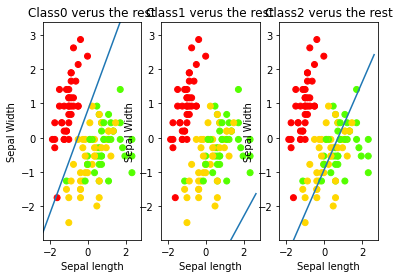

In [8]:
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5

y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
figure(figsize=(10, 6), dpi=80)
xs = np.arange(x_min, x_max, 0.5)
fig, axes = plt.subplots(1, 3)


for i in [0, 1, 2]:

  axes[i].set_title('Class'+ str(i) + ' verus the rest')
  axes[i].set_xlabel('Sepal length')
  axes[i].set_ylabel('Sepal Width')
  axes[i].set_xlim(x_min, x_max)
  axes[i].set_ylim(y_min, y_max)

  pylab.sca(axes[i])
  plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.prism)
  ys = (-clf.intercept_[i] - xs * clf.coef_[i, 0]) / clf.coef_[i, 1]
  plt.plot(xs, ys)


In [9]:
print(clf.predict(scaler.transform([[4.7, 3.1]])))

[0]


In [10]:
print(clf.decision_function(scaler.transform([[4.7, 3.1]])))

[[ 27.80915871  -3.68672411 -16.30119871]]


## Evaluate

In [11]:
from sklearn import metrics
y_train_pred = clf.predict(X_train)
print(metrics.accuracy_score(y_train, y_train_pred))

0.7083333333333334


In [12]:
y_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.8


In [13]:
## Confusion matrix

In [14]:
print(metrics.classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.57      0.57      0.57         7
   virginica       0.75      0.75      0.75        12

    accuracy                           0.80        30
   macro avg       0.77      0.77      0.77        30
weighted avg       0.80      0.80      0.80        30



In [15]:
print(metrics.confusion_matrix(y_test, y_pred))

[[11  0  0]
 [ 0  4  3]
 [ 0  3  9]]


In [16]:
from sklearn.model_selection import cross_val_score, KFold

from sklearn.pipeline import Pipeline

# Create a composite estimator made by a pipeline

In [23]:
X.shape[0]

150

In [27]:

clf = Pipeline([('scaler', preprocessing.StandardScaler()),
                ('linear_model', SGDClassifier())])

cv = KFold(n_splits=5, shuffle=True, random_state=47)

scores = cross_val_score(clf, X, y, cv=cv)

print(scores)

[0.86666667 0.83333333 0.83333333 0.5        0.5       ]


K-scores

In [29]:
from scipy.stats import sem
def mean_score(scores):
  return ("Mean score: {0:.3f} (+/- {1:.3f})").format(np.mean(scores), sem(scores))

print(mean_score(scores))

Mean score: 0.707 (+/- 0.085)
